In [1]:
import scanpy as sc
import anndata as ad
import Model as model
from Benchmark import monocle_prepare

In [2]:
ref = sc.read_h5ad("../Data/scdata/Simulation/adata1.h5ad")
adata1 = sc.read_h5ad("../Data/scdata/Simulation/adata2.h5ad")
adata2 = sc.read_h5ad("../Data/scdata/Simulation/adata3.h5ad")
ref.obs_names_make_unique()
adata1.obs_names_make_unique()
adata2.obs_names_make_unique()

/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
adata = ad.concat([ref, adata1, adata2], label="batch")
adata.obs_names_make_unique()

/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['Cell1-1', 'Cell1-2', 'Cell2-1', 'Cell2-2', 'Cell3-1']
  warnings.warn(


In [4]:
corrected_adata = model.batch_correct([adata1, adata2], ref)

Begin to find pairs of cells among multiple datasets...
Train Epoch: [200 /1000(20 %)]    G_loss: -0.031719    D_loss: 0.002251
Train Epoch: [400 /1000(40 %)]    G_loss: -0.030371    D_loss: -0.001924
Train Epoch: [600 /1000(60 %)]    G_loss: -0.029168    D_loss: -0.003309
Train Epoch: [800 /1000(80 %)]    G_loss: -0.029255    D_loss: -0.004052
Train Epoch: [1000/1000(100%)]    G_loss: -0.029997    D_loss: -0.004465
Datasets: [1 /2 (50 %)]
Train Epoch: [200 /1000(20 %)]    G_loss: 0.023864    D_loss: 0.004729
Train Epoch: [400 /1000(40 %)]    G_loss: 0.024086    D_loss: -0.000128
Train Epoch: [600 /1000(60 %)]    G_loss: 0.026464    D_loss: -0.000956
Train Epoch: [800 /1000(80 %)]    G_loss: 0.028986    D_loss: -0.001323
Train Epoch: [1000/1000(100%)]    G_loss: 0.031330    D_loss: -0.001562
Datasets: [2 /2 (100%)]
Cells have been paired successfully.

Begin to remove batch effects with ODBC-GAN...
Train Epoch: [200 /1000(20 %)]    G_loss: 2459.528564    D_loss: -1702.596436
Train Epoc

In [5]:
corrected_adata.write("./temp/corrected_adata.h5ad")

In [1]:
import scanpy as sc
corrected_adata = sc.read_h5ad("./temp/corrected_adata.h5ad")

/usr/local/anaconda3/envs/mamba/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/usr/local/anaconda3/envs/mamba/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.6 anndata==0.10.3 umap==0.5.5 numpy==1.22.4 scipy==1.11.1 pandas==1.5.2 scikit-learn==1.3.2 statsmodels==0.14.1 igraph==0.10.4 louvain==0.7.0 pynndescent==0.5.11
computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50


/usr/local/anaconda3/envs/mamba/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


    finished (0:00:00)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP


/usr/local/anaconda3/envs/mamba/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


/usr/local/anaconda3/envs/mamba/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/anaconda3/envs/mamba/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


[<Axes: title={'center': 'Model'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'cell.type'}, xlabel='UMAP1', ylabel='UMAP2'>]

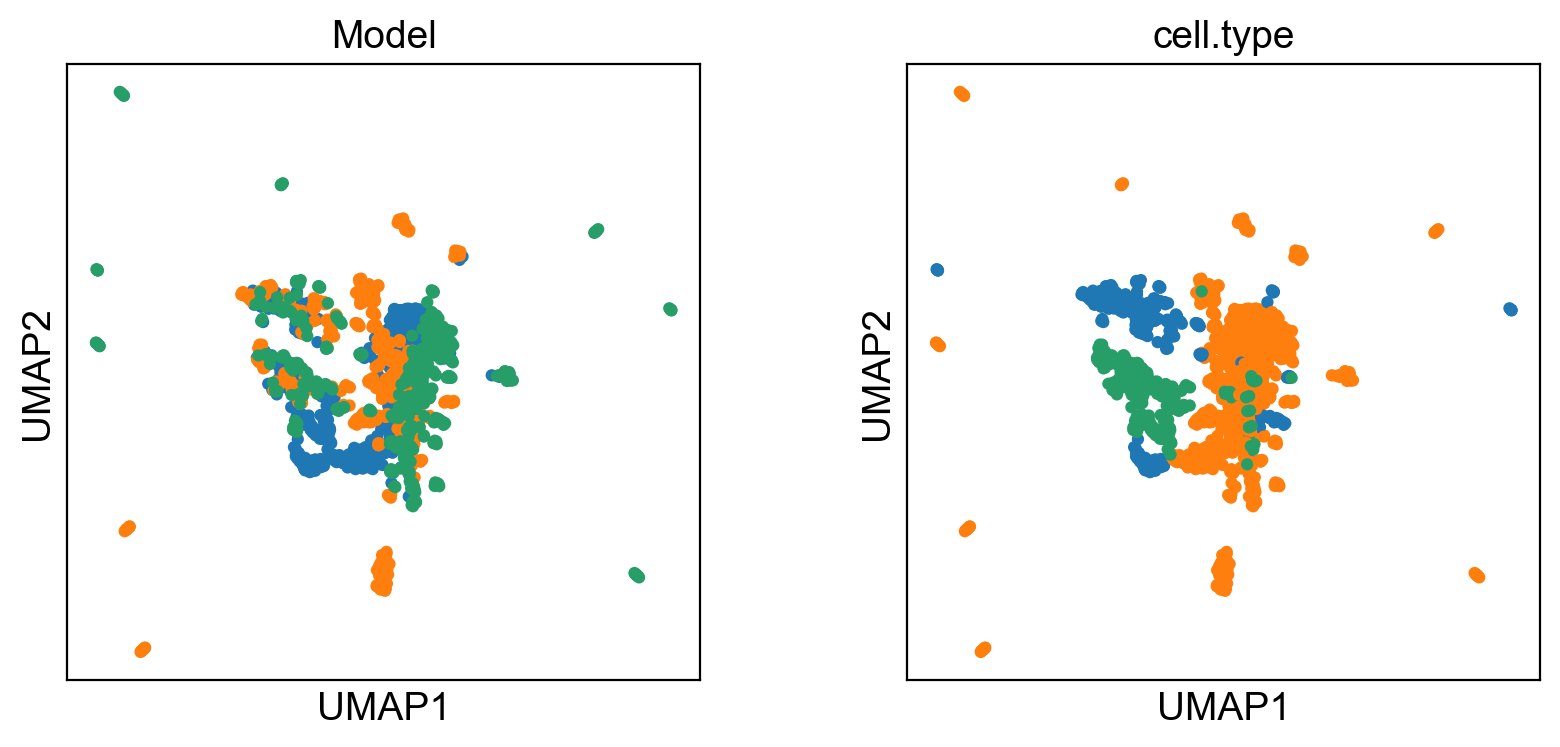

In [2]:
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.pp.neighbors(corrected_adata)
sc.tl.umap(corrected_adata)
sc.pl.umap(corrected_adata, legend_fontsize=8, legend_loc=None, color=["batch", "cell.type"],\
           title="Model", show=False)

In [3]:
from Benchmark import monocle_prepare
monocle_prepare(corrected_adata, random_state=42, save_dir = "/volume1/home/kliu/Data/temp")

Use computed Umap


/volume1/home/kliu/.local/lib/python3.9/site-packages/anndata2ri/py2r.py:45: UserWarning: Duplicated obs_names: Index(['Cell1-1', 'Cell1-1', 'Cell1-1', 'Cell10-1', 'Cell10-1', 'Cell10-2',
       'Cell10-2', 'Cell10-2', 'Cell100', 'Cell100',
       ...
       'Cell96-2', 'Cell97', 'Cell97', 'Cell97', 'Cell99-1', 'Cell99-1',
       'Cell99-1', 'Cell99-1', 'Cell99-1', 'Cell99-1'],
      dtype='object', name='index', length=1333)
  warn(f'Duplicated {name}: {idx[idx.duplicated(False)].sort_values()}')
